In [1]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 1.4 MB/s eta 0:00:001.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.0 MB/s eta 0:00:000:00:01m eta 0:00:01


In [2]:
from bert_score import score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import Levenshtein as lev 
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df_human = pd.read_csv('human_sentences.csv')
df_ai = pd.read_csv('ai_sentences.csv')

In [4]:
df_human.head()

,True Sentences,Generated Sentences
0,"many methods including CondInst, SOLOv2, SOTR,...",the baseline models across various backbones.
1,query-based instance segmentation methods by e...,existing query-based instance segmentation met...
2,"For example, the notion of $O^I_{n}$ in eq.5 a...",It would benefit from clearer explanations or ...
3,cost in Table 3 (b) and (c) to show the trade-...,usage for a more comprehensive evaluation.
4,"paper, which has better speed-accuracy trade-o...","experiments, which could provide a more thorou..."


In [5]:
df_ai.head()

,True Sentences,Generated Sentences
0,"training framework, highlighting the importanc...",training framework for query-based instance se...
1,demonstrate significant performance improvemen...,demonstrate the effectiveness of the approach.
2,"backbone networks and query-based models, with...",query-based instance segmentation models.
3,and memory capacity provides valuable insights...,and memory capacity is thorough and insightful.
4,or situations where the proposed framework mig...,and limitations of the proposed method.


In [6]:
def preprocess_text(text):
    text = text.lower() 
    text = re.sub(r'\s+', ' ', text) 
    text = text.strip() 
    return text

In [7]:
df_human['True Sentences'] = df_human['True Sentences'].apply(preprocess_text)
df_human['Generated Sentences'] = df_human['Generated Sentences'].apply(preprocess_text)
df_ai['True Sentences'] = df_ai['True Sentences'].apply(preprocess_text)
df_ai['Generated Sentences'] = df_ai['Generated Sentences'].apply(preprocess_text)

In [8]:
df_human.head()

,True Sentences,Generated Sentences
0,"many methods including condinst, solov2, sotr,...",the baseline models across various backbones.
1,query-based instance segmentation methods by e...,existing query-based instance segmentation met...
2,"for example, the notion of $o^i_{n}$ in eq.5 a...",it would benefit from clearer explanations or ...
3,cost in table 3 (b) and (c) to show the trade-...,usage for a more comprehensive evaluation.
4,"paper, which has better speed-accuracy trade-o...","experiments, which could provide a more thorou..."


In [9]:
df_ai.head()

,True Sentences,Generated Sentences
0,"training framework, highlighting the importanc...",training framework for query-based instance se...
1,demonstrate significant performance improvemen...,demonstrate the effectiveness of the approach.
2,"backbone networks and query-based models, with...",query-based instance segmentation models.
3,and memory capacity provides valuable insights...,and memory capacity is thorough and insightful.
4,or situations where the proposed framework mig...,and limitations of the proposed method.


In [10]:
def calculate_bertscore(true_sentences, generated_sentences):
    P, R, F1 = score(generated_sentences, true_sentences, lang='en', verbose=True)
    return P, R, F1

def calculate_edit_distance(true_sentences, generated_sentences):
    distances = [lev.distance(true, generated) for true, generated in zip(true_sentences, generated_sentences)]
    return distances

In [11]:
true_human = df_human['True Sentences'].tolist()
generated_human = df_human['Generated Sentences'].tolist()
precision_human, recall_human, f1_human = calculate_bertscore(true_human, generated_human)
edit_distances_human = calculate_edit_distance(true_human, generated_human)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/33 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/17 [00:00<?, ?it/s]

done in 203.22 seconds, 5.08 sentences/sec


In [12]:
true_ai = df_ai['True Sentences'].tolist()
generated_ai = df_ai['Generated Sentences'].tolist()
precision_ai, recall_ai, f1_ai = calculate_bertscore(true_ai, generated_ai)
edit_distances_ai = calculate_edit_distance(true_ai, generated_ai)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/42 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/21 [00:00<?, ?it/s]

done in 132.82 seconds, 9.93 sentences/sec


In [13]:
df_scores_human = pd.DataFrame({
    'True Sentences': true_human,
    'Generated Sentences': generated_human,
    'Precision': precision_human.numpy(),
    'Recall': recall_human.numpy(),
    'F1 Score': f1_human.numpy(),
    'Edit Distance': edit_distances_human
})

df_scores_ai = pd.DataFrame({
    'True Sentences': true_ai,
    'Generated Sentences': generated_ai,
    'Precision': precision_ai.numpy(),
    'Recall': recall_ai.numpy(),
    'F1 Score': f1_ai.numpy(),
    'Edit Distance': edit_distances_ai
})

array([[<Axes: title={'center': 'Precision'}>,
        <Axes: title={'center': 'Recall'}>],
       [<Axes: title={'center': 'F1 Score'}>,
        <Axes: title={'center': 'Edit Distance'}>]], dtype=object)

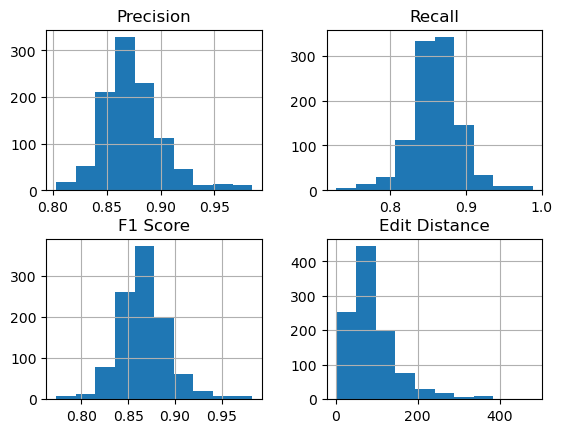

In [14]:
df_scores_human.hist()

array([[<Axes: title={'center': 'Precision'}>,
        <Axes: title={'center': 'Recall'}>],
       [<Axes: title={'center': 'F1 Score'}>,
        <Axes: title={'center': 'Edit Distance'}>]], dtype=object)

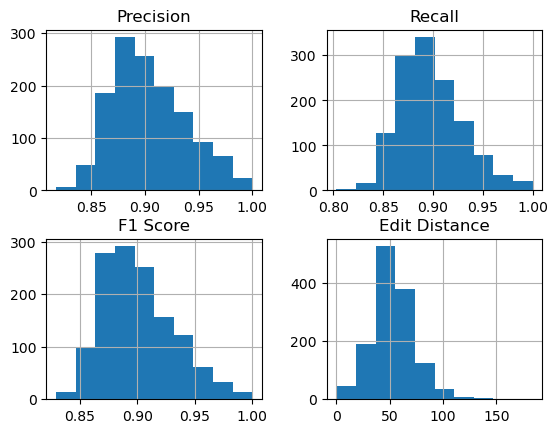

In [15]:
df_scores_ai.hist()

In [16]:
df_scores_human.to_csv('human_results.csv', index=False)
df_scores_ai.to_csv('ai_results.csv', index=False)